## Decisioin Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


In [2]:
import graphviz
from sklearn.tree import export_graphviz

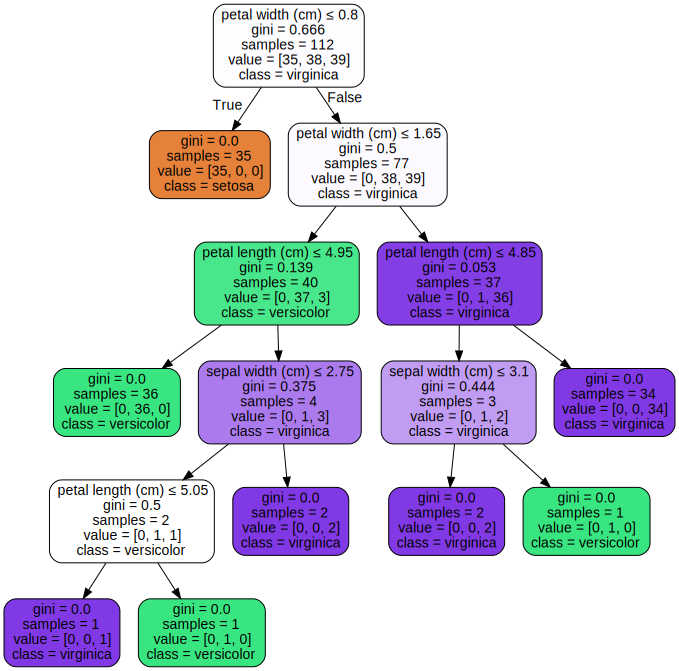

In [3]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Controlling tree complexity

In [4]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


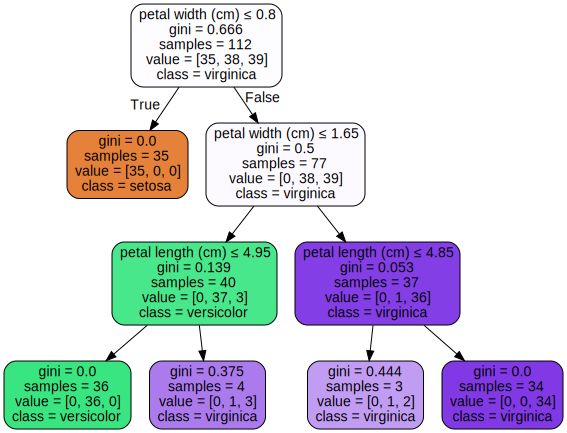

In [5]:
dot_data = export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [6]:
importances = clf2.feature_importances_

In [7]:
importances

array([0.        , 0.        , 0.06497876, 0.93502124])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

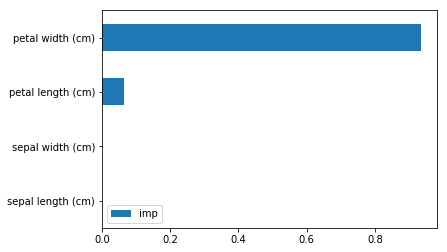

In [8]:
important=pd.DataFrame(clf2.feature_importances_,index=iris.feature_names,columns=['imp'])
important.sort_values(by='imp').plot(kind='barh')



## Ensembles of Trees

### Import required modules 

If you see import exceptions, try to reinstall the library in the anaconda command prompt with:

pip install 'the library name here'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as AUC, log_loss
#from sklearn.calibration import CalibratedClassifierCV

import xgboost as xgb
import lightgbm as lgb

%matplotlib inline
%matplotlib notebook

ModuleNotFoundError: No module named 'xgboost'

### Load data file into pandas Data Frame.

Please download the data file (churn_train_complete.csv) from canvas into your local drive.

Please name your dataframe as **churn**

In [10]:
churn=pd.read_csv("C:\\Users\\a02262028\\documents/data/churn/churn_train_complete.csv")

FileNotFoundError: File b'C:\\Users\\a02262028\\documents/data/churn/churn_train_complete.csv' does not exist

## Discription of the data

The dataset contains about 1 million subscribers to an online music provider.

For a subscription business, accurately predicting churn (**when a subscriber discontinue a service**) is critical to long-term success. Even slight variations in churn can drastically affect profits.

The goal of the task is to predict who will churn.

A brief description of the data columns:
+ 'msno': the unique identification of a subscriber
+ 'is_churn': the label or the target, indicating whether a subscriber has churned,is_churn = 1 means churn,is_churn = 0 means renewal.
+ 'logs_count': number of logs for listening behaviors of a subscriber
+ 'city': the city of a subscriber choose when registrated
+ 'bd': age
+ 'gender': gender
+ 'registered_via': registration method
+ 'registration_init_time': registration date
+ 'trans_count': number of transactions a subscriber completed
+ 'payment_method_id': payment_method
+ 'payment_plan_days': days in a payment_plan
+ 'plan_list_price': price
+ 'actual_amount_paid': actual_amount_paid
+ 'is_auto_renew': whether the plan is auto renewed
+ 'is_cancel': whether or not the user canceled the membership in this transaction.
+ 'cancel_count': how many times the user has cancelled the service in the past.
+ 'date': last recorded log date
+ 'num_25': # of songs played less than 25% of the song length in the last activity
+ 'num_50': # of songs played between 25% to 50% of the song length  in the last activity
+ 'num_75': # of songs played between 50% to 75% of of the song length in the last activity
+ 'num_985': # of songs played between 75% to 98.5% of the song length in the last activity
+ 'num_100': # of songs played over 98.5% of the song length in the last activity
+ 'num_unq': # of unique songs played in the last activity
+ 'total_secs': total seconds played in the last activity

### Split the data and choose the first 5000 samples.

In [18]:
churn=churn.fillna(0)# fill all missing values as 0 for now.

cols = [c for c in churn.columns if c not in ['is_churn','msno']] #get feature column names excluding is_churn, msno
X=churn[cols]
y=churn['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

x1=X_train.iloc[:5000,:]
y1=y_train.iloc[:5000]
x2=X_test.iloc[:5000,:]
y2=y_test.iloc[:5000]

In [19]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)
print('x2 shape is ',x2.shape)
print('y2 shape is ',y2.shape)

x1 shape is  (5000, 22)
y1 shape is  (5000,)
x2 shape is  (5000, 22)
y2 shape is  (5000,)


## Random Forest

### 1. Use default parameters

In [20]:
clf=RandomForestClassifier(random_state=0)
clf.fit(x1,y1)
predprob_y=clf.predict_proba(x2)# output probabilities for test data
print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.'.format(clf.score(x1,y1),clf.score(x2,y2)))

Training accuracy is 0.99020 and test accuracy is 0.95120.


#### Use two other performance metrics, AUC and logloss


In [21]:
print('AUC is {}, and logloss is {}'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

AUC is 0.6785572715268644, and logloss is 0.47385157334061206


#### Display feature importance

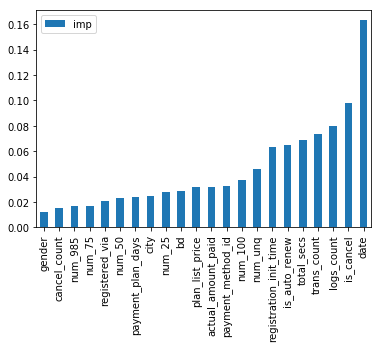

In [22]:
important=pd.DataFrame(clf.feature_importances_,index=X.columns,columns=['imp'])
important.sort_values(by='imp').plot(kind='bar')

In [23]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 2. Tuning parameters

We should use cross validation to tune the parameters, since we have not talked about it, so we just ignore it for now.

#### A. n_estimators

n_estimators specify how many trees you want to build, or how many sample sets you want to generate.

Larger dataset should try large number to avoid overfitting.

In [10]:
import time
s=time.time()
results=[]
for n in range(50,501,50):
    clf=RandomForestClassifier(n_estimators=n, random_state=0,n_jobs=-1)
    clf.fit(x1,y1)
    predprob_y=clf.predict_proba(x2)# output probabilities for test data
    results.append([clf.score(x1,y1),clf.score(x2,y2),AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y),log_loss(y1, clf.predict_proba(x1))])
    #print('Training accuracy is {0} and test accuracy is {1}.'.format(clf.score(x1,y1),clf.score(x2,y2)))
    #print('AUC is {}, and logloss is {}\n'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result=pd.DataFrame(results,index=range(50,501,50),columns=['train accuracy','test accuracy','AUC','test logloss','train logloss'])  

result.sort_values(by='test accuracy',inplace=True,ascending =False)

result

Model fitted in 15.93 seconds


,train accuracy,test accuracy,AUC,test logloss,train logloss
300,0.9970,0.9568,0.715795,0.191171,0.041940
200,0.9970,0.9566,0.714261,0.197131,0.041951
250,0.9970,0.9564,0.714154,0.196702,0.041981
450,0.9970,0.9564,0.714154,0.179957,0.041936
350,0.9970,0.9562,0.714047,0.185737,0.041975
500,0.9970,0.9562,0.714047,0.179988,0.041930
150,0.9970,0.9560,0.708233,0.203563,0.042065
400,0.9970,0.9560,0.712514,0.185970,0.042007
100,0.9970,0.9554,0.706486,0.215981,0.042047
50,0.9968,0.9542,0.701563,0.271177,0.042431


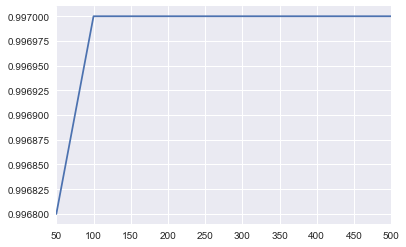

In [11]:
result['train accuracy'].sort_index().plot()

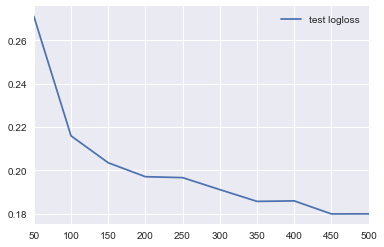

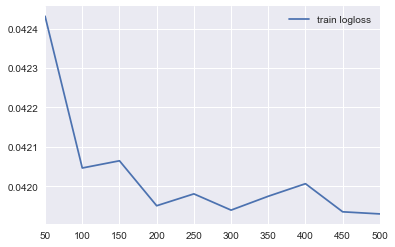

In [10]:
result[['test logloss']].sort_index().plot()

result[['train logloss']].sort_index().plot()

#### Using n_jobs to take advantage of multicore

How many cores to use in parallel during training (-1 for all available).

In [11]:
import time
s=time.time()
results=[]
for n in range(1,501,50):
    clf=RandomForestClassifier(n_estimators=n, random_state=0,n_jobs=-1)
    clf.fit(x1,y1)
    predprob_y=clf.predict_proba(x2)# output probabilities for test data
    results.append([clf.score(x1,y1),clf.score(x2,y2),AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)])
    #print('Training accuracy is {0} and test accuracy is {1}.'.format(clf.score(x1,y1),clf.score(x2,y2)))
    #print('AUC is {}, and logloss is {}\n'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

print('Model fitted in {:.2f} seconds'.format(time.time()-s))

Model fitted in 12.06 seconds


#### B. max_features

It controls the number of features that a single tree node  can use. 

It has a strong effect on performance. Influences the diversity of trees in the forest. Default works well in practice, but adjusting may lead to some further gains.

Default:

Classification: max_features=sqrt(n_features)

Regressioin: max_features=n_features

In [12]:
import time
s=time.time()
results=[]
for n in range(1,X.shape[1]+1):
    clf=RandomForestClassifier(n_estimators=300, random_state=0,n_jobs=-1,max_features=n)
    clf.fit(x1,y1)
    predprob_y=clf.predict_proba(x2)# output probabilities for test data
    results.append([clf.score(x1,y1),clf.score(x2,y2),AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y),log_loss(y1, clf.predict_proba(x1))])
    #print('Training accuracy is {0} and test accuracy is {1}.'.format(clf.score(x1,y1),clf.score(x2,y2)))
    #print('AUC is {}, and logloss is {}\n'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result=pd.DataFrame(results,index=range(1,X.shape[1]+1),columns=['train accuracy','test accuracy','AUC','test logloss','train logloss'])  

result.sort_values(by='test accuracy',inplace=True,ascending =False)

result

Model fitted in 50.53 seconds


,train accuracy,test accuracy,AUC,test logloss,train logloss
16,0.997,0.9578,0.729171,0.202042,0.040365
14,0.997,0.9578,0.724890,0.202024,0.040314
11,0.997,0.9574,0.723250,0.185893,0.040244
15,0.997,0.9574,0.724677,0.190968,0.040192
9,0.997,0.9572,0.721716,0.178054,0.040633
13,0.997,0.9572,0.721716,0.191270,0.040275
12,0.997,0.9570,0.724463,0.190480,0.040394
7,0.997,0.9570,0.718755,0.183930,0.040874
8,0.997,0.9570,0.720182,0.178793,0.040692
10,0.997,0.9570,0.721609,0.178138,0.040711


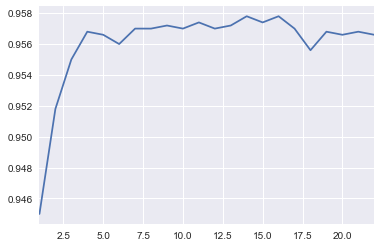

In [13]:
result['test accuracy'].sort_index().plot()

In [13]:
import time
s=time.time()
clf=RandomForestClassifier(n_estimators=300, random_state=0,n_jobs=-1,max_features=16)
clf.fit(x1,y1)
predprob_y_rf=clf.predict_proba(x2)# output probabilities for test data
pred_y_rf=clf.predict(x2)
print('Model fitted in {:.2f} seconds'.format(time.time()-s))

print('The test accuracy is {} and logloss is {}'.format(clf.score(x2,y2),log_loss(y2, predprob_y_rf)))

Model fitted in 2.32 seconds
The test accuracy is 0.9578 and logloss is 0.20204163589817237


### Use gridsearch with cross-validation for two parameters.

** The following code will run several hours, don't run if you don't have time. **

In [15]:
'''
s=time.time()

parameters={'n_estimators':range(200,501,20), 'max_features':range(4,21)}

clf = GridSearchCV(RandomForestClassifier(random_state=0), n_jobs=-1,parameters,cv=10)
clf.fit(x1,y1)
print('Model fitted in {} seconds'.format(time.time()-s))
print(clf.score(x2,y2))
print ('best parameters are {}'.format(clf.best_params_))

'''

"\ns=time.time()\n\nparameters={'n_estimators':range(200,501,20), 'max_features':range(4,21)}\n\nclf = GridSearchCV(RandomForestClassifier(random_state=0), n_jobs=-1,parameters,cv=10)\nclf.fit(x1,y1)\nprint('Model fitted in {} seconds'.format(time.time()-s))\nprint(clf.score(x2,y2))\nprint ('best parameters are {}'.format(clf.best_params_))\n\n"

In [16]:
predprob_y=clf.predict_proba(x2)

In [17]:
print('AUC is {:.5f}, and logloss is {:.5f}\n'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

AUC is 0.72917, and logloss is 0.20204



### Check the feature importance again!

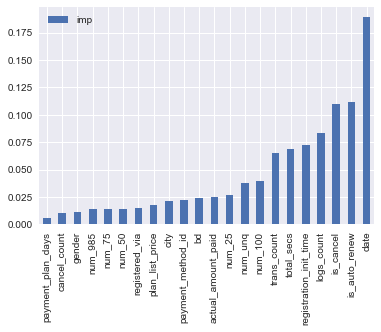

In [14]:
important=pd.DataFrame(clf.feature_importances_,index=X.columns,columns=['imp'])
important.sort_values(by='imp').plot(kind='bar')

## Gradient Boosted Trees

### 1. Use default parameters

In [15]:
#from sklearn.ensemble import GradientBoostingClassifier as GBC

s=time.time()
clf_gbc=GBC(random_state =0)
clf_gbc.fit(x1,y1)

print('Model fitted in {:.2f} seconds'.format(time.time()-s))
print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.'.format(clf_gbc.score(x1,y1),clf_gbc.score(x2,y2)))

gbc_pred=clf_gbc.predict_proba(x2)

l2=log_loss(y2, gbc_pred)
# 0.13607811669233305
print('The log loss on test data is {:.5f}.'.format(l2))

Model fitted in 0.43 seconds
Training accuracy is 0.96720 and test accuracy is 0.95540.
The log loss on test data is 0.13561.


In [20]:
clf_gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

#### Feature importance

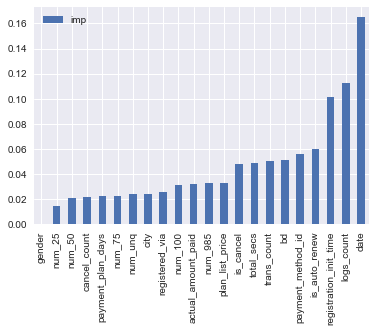

In [16]:
important=pd.DataFrame(clf_gbc.feature_importances_,index=X.columns,columns=['imp'])
important.sort_values(by='imp').plot(kind='bar')

### 2. Tuning the parameters

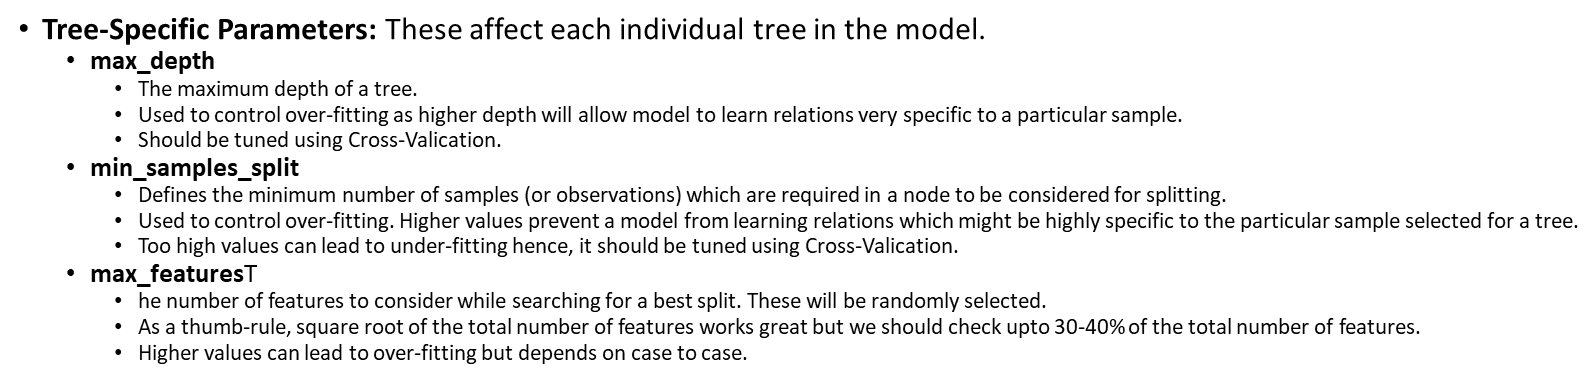

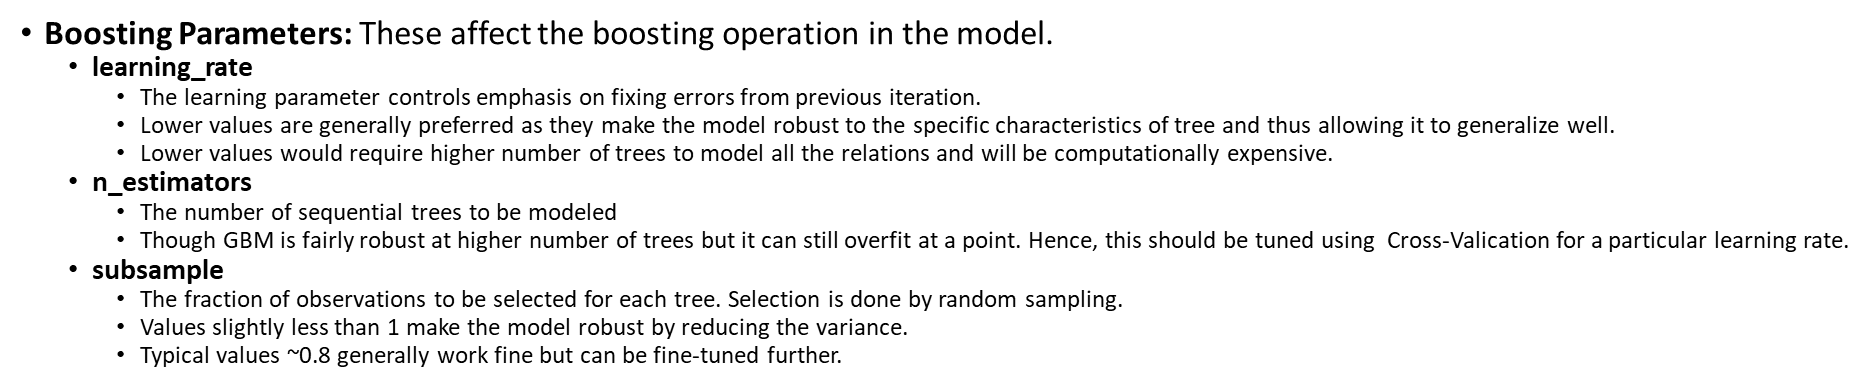

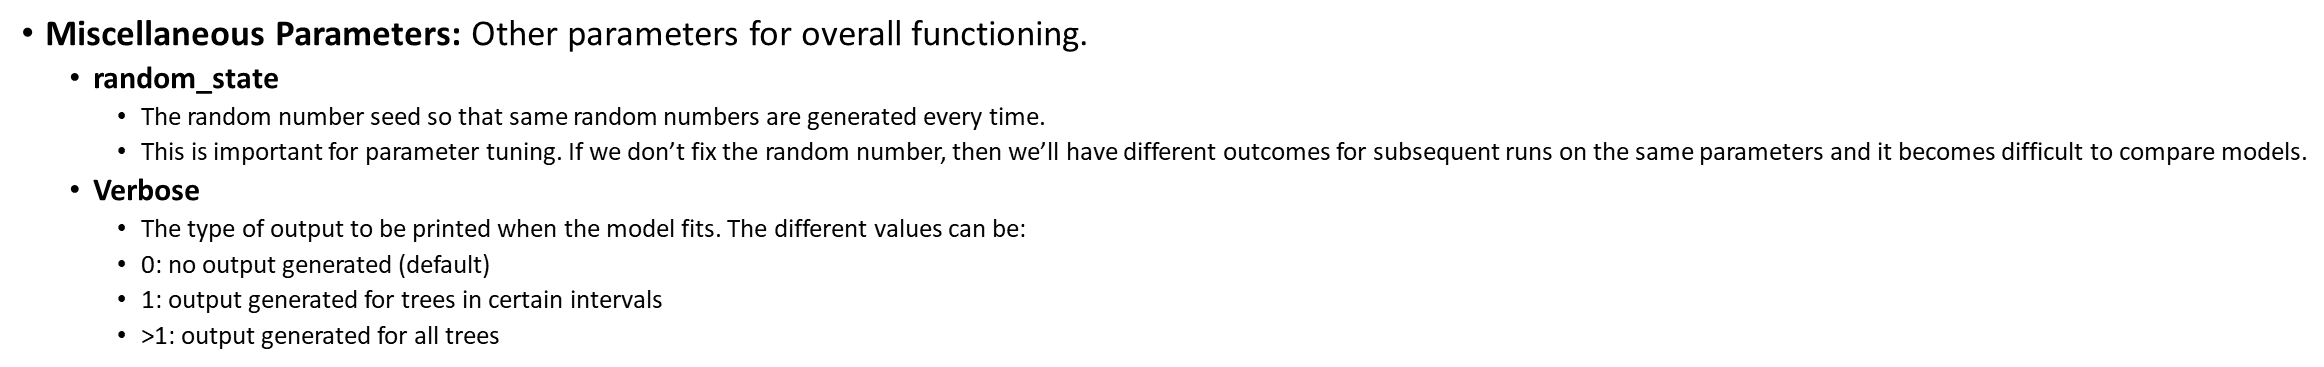

### Tips for tuning the parameters

+ Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
+ Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
+ Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
+ Lower the learning rate and increase the estimators proportionally to get more robust models.

**We need to use cross-validation to tune the parameters.**

#### A. Using cross validation on default parameters and make it into a function, then we can reuse it later.

In [17]:
from sklearn.model_selection import cross_val_score

def cv_clf(clf):
    s=time.time()
    clf_gbc=clf
    clf_gbc.fit(x1,y1)
    cv_score = cross_val_score(clf_gbc, x1, y1, cv=5, scoring='accuracy',n_jobs=-1)
    print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))
    print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_gbc.score(x1,y1),clf_gbc.score(x2,y2)))
    print('Cross-Validation Accuracy Score: \nMean - {0:.5f} | Std - {1:.5f} | Min - {2:.5f} | Max - {3:.5f}'.format(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    cv_score = cross_val_score(clf_gbc, x1, y1, cv=5, scoring='neg_log_loss')
    print('\nCross-Validation Log loss Score: \nMean - {0:.5f} | Std - {1:.5f} | Min - {2:.5f} | Max - {3:.5f}'.format(abs(np.mean(cv_score)),np.std(cv_score),abs(np.min(cv_score)),abs(np.max(cv_score))))

clf=GBC(random_state =0)
cv_clf(clf)

Model fitted in 9.10 seconds.

Training accuracy is 0.96720 and test accuracy is 0.95540.

Cross-Validation Accuracy Score: 
Mean - 0.95260 | Std - 0.00375 | Min - 0.94595 | Max - 0.95600

Cross-Validation Log loss Score: 
Mean - 0.14957 | Std - 0.01026 | Min - 0.16604 | Max - 0.13464


### B. Using default learning rate, and try to find best n_estimators

Before we tune n_estimators, we use the following as the start values
+ max_depth=7,
+ max_features= 'sqrt',
+ min_samples_split=5, 
+ subsample=0.8,

In [18]:
param_grid = {'n_estimators':range(20,101,10)}
clf_grid = GridSearchCV(estimator = GBC(learning_rate=0.1, min_samples_split=5,max_depth=7,max_features='sqrt',subsample=0.8,random_state=0), 
param_grid = param_grid, scoring='accuracy',n_jobs=-1,cv=5)

s=time.time()
clf_grid.fit(x1,y1)

gbc_pred_grid=clf_grid.predict_proba(x2)

l2=log_loss(y2, gbc_pred_grid)

print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))

#print('Grid search accuracy scores on training data:\n{}'.format(clf_grid.grid_scores_))

print('Grid search best parameters:\n{}\n'.format(clf_grid.best_params_))

print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

print('The log loss on test data is {:.5f}.'.format(l2))

Model fitted in 13.66 seconds.

Grid search best parameters:
{'n_estimators': 40}

Training accuracy is 0.98020 and test accuracy is 0.95520.

The log loss on test data is 0.14040.


### Check the cross validation results

In [24]:
clf= GBC(learning_rate=0.1, min_samples_split=5,max_depth=7,max_features='sqrt',subsample=0.8,random_state=0,n_estimators=40)

cv_clf(clf)

Model fitted in 7.57 seconds.

Training accuracy is 0.98020 and test accuracy is 0.95520.

Cross-Validation Accuracy Score: 
Mean - 0.94960 | Std - 0.00473 | Min - 0.94294 | Max - 0.95700

Cross-Validation Log loss Score: 
Mean - 0.15850 | Std - 0.01032 | Min - 0.17076 | Max - 0.14513


### C. Use n_estimators = 40, tune other tree specific parameters


In [25]:
param_grid = {'max_depth':range(2,11),'min_samples_split': range(2,20)}
clf_grid = GridSearchCV(estimator = GBC(learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=0,n_estimators = 40), 
param_grid = param_grid, scoring='accuracy',n_jobs=-1,cv=5)

s=time.time()
clf_grid.fit(x1,y1)

gbc_pred_grid=clf_grid.predict_proba(x2)

l2=log_loss(y2, gbc_pred_grid)

print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))

#print('Grid search accuracy scores on training data:\n{}'.format(clf_grid.grid_scores_))

print('Grid search best parameters:\n{}\n'.format(clf_grid.best_params_))

print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

print('The log loss on test data is {:.5f}.'.format(l2))

Model fitted in 72.64 seconds.

Grid search best parameters:
{'max_depth': 3, 'min_samples_split': 17}

Training accuracy is 0.95860 and test accuracy is 0.95660.

The log loss on test data is 0.14197.


### Check cross validation results

In [19]:
clf= GBC(learning_rate=0.1, min_samples_split=17,max_depth=3,max_features='sqrt',subsample=0.8,random_state=0,n_estimators=40)

cv_clf(clf)

Model fitted in 7.48 seconds.

Training accuracy is 0.95860 and test accuracy is 0.95660.

Cross-Validation Accuracy Score: 
Mean - 0.95440 | Std - 0.00369 | Min - 0.94895 | Max - 0.95800

Cross-Validation Log loss Score: 
Mean - 0.15456 | Std - 0.00848 | Min - 0.16660 | Max - 0.14116


Training accuracy is 0.98020 and test accuracy is 0.95520.



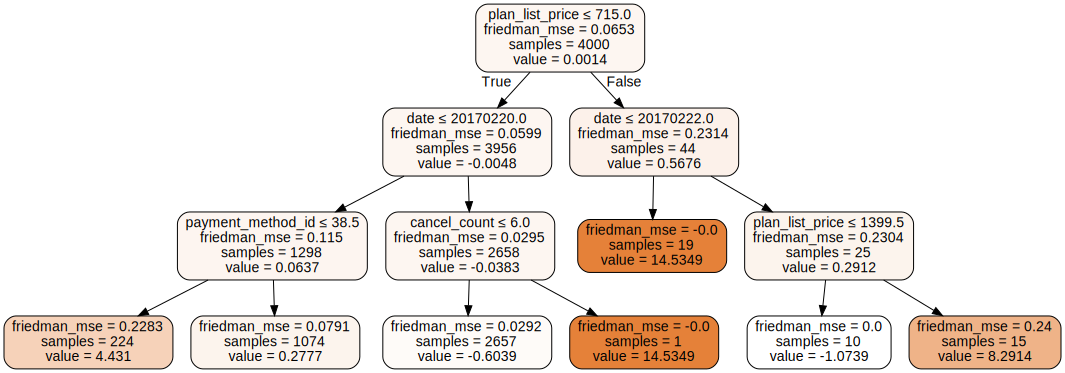

In [20]:
import graphviz
from sklearn.tree import export_graphviz

clf=GBC(learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=0,n_estimators = 40,max_depth=3, min_samples_split= 17)
clf.fit(x1,y1)

sub_tree_0 = clf.estimators_[0, 0]
print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

dot_data = export_graphviz(sub_tree_0, out_file=None, 
                         feature_names=x1.columns,  
                         class_names={0:'churn',1:'not churn'},  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

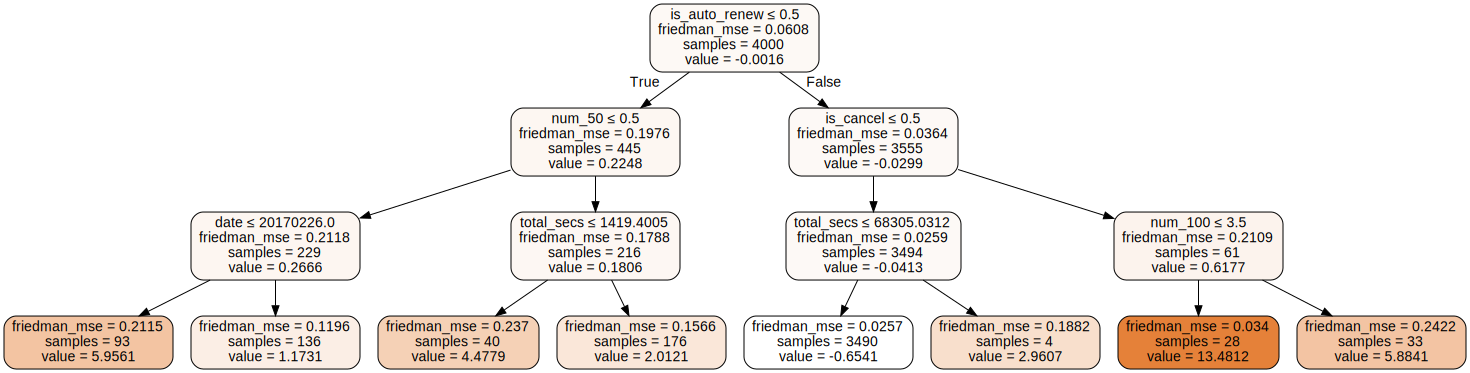

In [28]:
sub_tree_1 = clf.estimators_[1, 0]
dot_data = export_graphviz(sub_tree_1, out_file=None, 
                         feature_names=x1.columns,  
                         class_names={0:'churn',1:'not churn'},  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### D. Tune min_samples_leaf

In [29]:

param_grid = {'min_samples_split': range(20,40),'min_samples_leaf':range(1,51)}
clf_grid = GridSearchCV(estimator = GBC(learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=0,n_estimators = 40,max_depth=3), 
param_grid = param_grid, scoring='accuracy',n_jobs=-1,cv=5)

s=time.time()
clf_grid.fit(x1,y1)

gbc_pred_grid=clf_grid.predict_proba(x2)

l2=log_loss(y2, gbc_pred_grid)

print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))

#print('Grid search accuracy scores on training data:\n{}'.format(clf_grid.grid_scores_))

print('Grid search best parameters:\n{}\n'.format(clf_grid.best_params_))

print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

print('The log loss on test data is {:.5f}.'.format(l2))    
    

Model fitted in 204.21 seconds.

Grid search best parameters:
{'min_samples_leaf': 1, 'min_samples_split': 20}

Training accuracy is 0.95860 and test accuracy is 0.95660.

The log loss on test data is 0.14151.


### Check cross validation results

In [30]:
clf= GBC(learning_rate=0.1, min_samples_split=20,max_depth=3,min_samples_leaf=1,max_features='sqrt',subsample=0.8,random_state=0,n_estimators=40)

cv_clf(clf)

Model fitted in 7.98 seconds.

Training accuracy is 0.95860 and test accuracy is 0.95660.

Cross-Validation Accuracy Score: 
Mean - 0.95440 | Std - 0.00369 | Min - 0.94895 | Max - 0.95800

Cross-Validation Log loss Score: 
Mean - 0.15440 | Std - 0.00810 | Min - 0.16558 | Max - 0.14153


### Tune max_features

In [31]:
param_grid = {'max_features':range(1,22)}
clf_grid = GridSearchCV(estimator = GBC(learning_rate=0.1, subsample=0.8,random_state=0,n_estimators = 40,
                                        min_samples_leaf= 1, min_samples_split= 20,max_depth=3), 
param_grid = param_grid, scoring='accuracy',n_jobs=-1,cv=5)

s=time.time()
clf_grid.fit(x1,y1)

gbc_pred_grid=clf_grid.predict_proba(x2)

l2=log_loss(y2, gbc_pred_grid)

print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))

#print('Grid search accuracy scores on training data:\n{}'.format(clf_grid.grid_scores_))

print('Grid search best parameters:\n{}\n'.format(clf_grid.best_params_))

print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

print('The log loss on test data is {:.5f}.'.format(l2))    
    

Model fitted in 15.03 seconds.

Grid search best parameters:
{'max_features': 8}

Training accuracy is 0.96020 and test accuracy is 0.95700.

The log loss on test data is 0.13818.


### Check cross validation results

In [32]:
clf= GBC(learning_rate=0.1, min_samples_split=20,max_depth=3,min_samples_leaf=1,max_features=8,subsample=0.8,random_state=0,n_estimators=40)

cv_clf(clf)

Model fitted in 7.24 seconds.

Training accuracy is 0.96020 and test accuracy is 0.95700.

Cross-Validation Accuracy Score: 
Mean - 0.95500 | Std - 0.00318 | Min - 0.94995 | Max - 0.95900

Cross-Validation Log loss Score: 
Mean - 0.14883 | Std - 0.00986 | Min - 0.16309 | Max - 0.13380


### Tune subsample

In [33]:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
clf_grid = GridSearchCV(estimator = GBC(learning_rate=0.1, random_state=0,n_estimators = 40,max_features=8,
                                        min_samples_leaf= 1, min_samples_split= 20,max_depth=3), 
param_grid = param_grid, scoring='accuracy',n_jobs=-1,cv=5)

s=time.time()
clf_grid.fit(x1,y1)

gbc_pred_grid=clf_grid.predict_proba(x2)

l2=log_loss(y2, gbc_pred_grid)

print('Model fitted in {:.2f} seconds.\n'.format(time.time()-s))

#print('Grid search accuracy scores on training data:\n{}'.format(clf_grid.grid_scores_))

print('Grid search best parameters:\n{}\n'.format(clf_grid.best_params_))

print('Training accuracy is {0:.5f} and test accuracy is {1:.5f}.\n'.format(clf_grid.score(x1,y1),clf_grid.score(x2,y2)))

print('The log loss on test data is {:.5f}.'.format(l2))    
    

Model fitted in 9.63 seconds.

Grid search best parameters:
{'subsample': 0.8}

Training accuracy is 0.96020 and test accuracy is 0.95700.

The log loss on test data is 0.13818.


### Decrease learning rate (use one-fifth of the default, i.e., from 0.1 to 0.02) and increase n_estimators accordingly (from 40 to 200)

In [34]:
clf= GBC(learning_rate=0.02, min_samples_split=20,max_depth=3,
         min_samples_leaf=1,max_features=8,subsample=0.8,random_state=0,n_estimators=200)
clf.fit(x1,y1)
predprob_y_gbc=clf.predict_proba(x2)

cv_clf(clf)

Model fitted in 9.62 seconds.

Training accuracy is 0.95960 and test accuracy is 0.95860.

Cross-Validation Accuracy Score: 
Mean - 0.95380 | Std - 0.00334 | Min - 0.94895 | Max - 0.95804

Cross-Validation Log loss Score: 
Mean - 0.14928 | Std - 0.00964 | Min - 0.16417 | Max - 0.13445


## Blend random forest and gradient boosted trees

In [35]:
predprob_y=(predprob_y_gbc+predprob_y_rf)/2
print('test log loss is {:.5f}.\n'.format(log_loss(y2,predprob_y)))
pred_y_blend=np.rint(predprob_y).astype('int')
print('the test accuracy is {}.\n'.format((pred_y_blend[:,1]==y2).sum()/5000))

test log loss is 0.13615.

the test accuracy is 0.9586.



In [36]:
predprob_y=0.7*predprob_y_gbc+0.3*predprob_y_rf
print('test log loss is {:.5f}.\n'.format(log_loss(y2,predprob_y)))
pred_y_blend=np.rint(predprob_y).astype('int')
print('the test accuracy is {}.\n'.format((pred_y_blend[:,1]==y2).sum()/5000))

test log loss is 0.13559.

the test accuracy is 0.9584.



## Use XGBoost

In [24]:
import xgboost as xgb

fold = 1
for i in range(fold):
    params = {
        'eta': 0.02, 
        'max_depth': 6,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 400,  watchlist,  maximize=False, verbose_eval=50, early_stopping_rounds=50) 
    if i != 0:
        pred_y2 += model.predict(xgb.DMatrix(x2, y2), ntree_limit=model.best_ntree_limit)
        pred_y1 += model.predict(xgb.DMatrix(x1, y1), ntree_limit=model.best_ntree_limit)
    else:
        pred_y2 = model.predict(xgb.DMatrix(x2, y2), ntree_limit=model.best_ntree_limit)
        pred_y1 = model.predict(xgb.DMatrix(x1, y1), ntree_limit=model.best_ntree_limit)
#pred /= fold

print('test log loss is {}\n'.format(log_loss(y2,pred_y2)))


[0]	train-logloss:0.676135	valid-logloss:0.676415
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[50]	train-logloss:0.268469	valid-logloss:0.278297
[100]	train-logloss:0.159877	valid-logloss:0.177374
[150]	train-logloss:0.124013	valid-logloss:0.14867
[200]	train-logloss:0.102135	valid-logloss:0.141229
[250]	train-logloss:0.090796	valid-logloss:0.139881
[300]	train-logloss:0.084568	valid-logloss:0.13979
Stopping. Best iteration:
[273]	train-logloss:0.087039	valid-logloss:0.13966

test log loss is 0.13965976285748183

